In [3]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 70.9/70.9 MB 340.0 kB/s eta 0:00:00


In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load the data
df = pd.read_csv('CARS_1.csv')
df.isnull().sum()
df['seating_capacity'].fillna(df['seating_capacity'].mean(), inplace = True)
df.isnull().sum()
df['fuel_tank_capacity'] = df['fuel_tank_capacity'].apply(lambda x:x+5)
Cars = df.rename(columns={
    'fuel_type': 'Fuel', 
    'fuel_tank_capacity': 'Tank_size', 
    'reviews_count': 'Reviews', 
    'car_name': 'Car', 
    'seating_capacity': 'Seat', 
    'body_type': 'Build', 
    'max_power_bhp': 'Power', 
    'transmission_type': 'Transmission', 
    'max_torque_nm': 'Torque', 
    'ending_price': 'Max_price',
    'engine_displacement': 'Engine',
    'rating': 'Rating',
    'no_cylinder': 'Cylinders', 
    'max_power_rp': 'Max_Power_RPM', 
    'max_torque_rpm': 'Max_Torque_RPM', 
    'starting_price': 'Starting_Price'
})
# Cars
Cars["Price"] = (Cars['Starting_Price'] + Cars['Max_price'])/2
Cars

,Car,Reviews,Fuel,Engine,Cylinders,Seat,Transmission,Tank_size,Build,Rating,Starting_Price,Max_price,Torque,Max_Torque_RPM,Power,Max_Power_RPM,Price
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,32.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500,491000.0
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,53.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000,1097500.0
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,62.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750,1478000.0
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,65.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500,1888000.0
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,62.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500,1794500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Mercedes-Benz AMG A 45 S,35,Petrol,1991,4,5.0,Automatic,5.0,Hatchback,4.5,659000,999000,500.0,5250,415.71,6750,829000.0
199,BMW 3 Series Gran Limousine,3,Petrol,1998,4,5.0,Automatic,64.0,Sedan,4.5,1041000,1041000,400.0,4400,254.79,5000,1041000.0
200,MG Hector Plus,2,Diesel,1956,4,7.0,Manual,65.0,SUV,4.5,1615000,2075000,350.0,2500,167.67,3750,1845000.0
201,Audi RS Q8,9,Petrol,3998,8,5.0,Automatic,90.0,SUV,3.5,21700000,21700000,800.0,4500,591.39,6000,21700000.0


In [10]:
# Encode the categorical variables using one-hot encoding
encoder = OneHotEncoder()
encoded = encoder.fit_transform(Cars[['Fuel', 'Transmission', 'Build']])
encoded_df = pd.DataFrame(encoded.toarray())
if hasattr(encoder, 'get_feature_names_out'):
    # scikit-learn version >= 0.22
    encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
else:
    # scikit-learn version < 0.22
    encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])
X = pd.concat([Cars.drop(['Car', 'Fuel', 'Transmission', 'Build', 'Price'], axis=1), encoded_df], axis=1)
y = Cars['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R-squared score:  0.9886760158019304
Mean absolute error:  711290.518292683


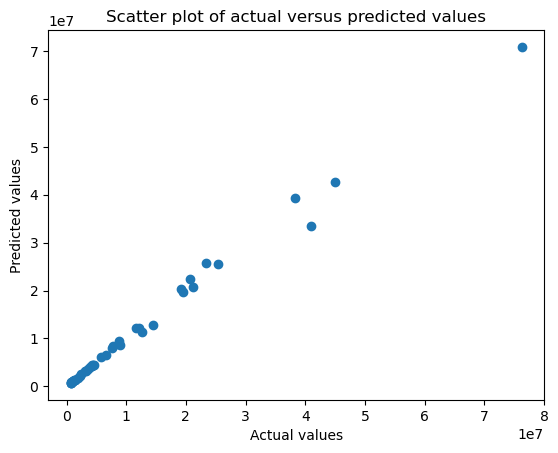

In [11]:
# Fit an XGBoost regression model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("R-squared score: ", r2)
print("Mean absolute error: ", mae)

import matplotlib.pyplot as plt

# Create a scatter plot of the actual versus predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of actual versus predicted values')
plt.show()


In [5]:
# review=input("Enter the reviews count: ")
# engine_dis=input("Enter the Engine Displacement: ")
# cylinder=input("Enter the cylinder count: ")
# seat=input("Enter the seats count: ")
# tank_size=input("Enter the Tank size: ")
# rate=input("Enter the ratings: ")
# minp=input("Enter the Minimum Price given for the car: ")
# maxp=input("Enter the Maximum Price given for the car: ")
# tnm=input("Enter the torque(nm): ")
# tbhp=input("Enter the torque(bhp): ")
# pbhp=input("Enter the power(bhp): ")
# prp=input("Enter the power(rp): ")
# fuel_type=input("Enter the car fuel type: ")

# transmission=input("Enter the car transmission type: ")
# transmission_type_map = {'Automatic': 0, 'Electric': 1, 'Manual': 2}

# body=input("Enter the car body build type: ")
# body_type_map = {'Convertible': 0, 'Coupe': 1, 'Hatchback': 2, 'Hybrid': 3, 'Luxury': 4, 'MUV': 5, 
#                  'Minivan': 6, 'Pickup Truck': 7, 'SUV': 8, 'Sedan': 9, 'Wagon': 10}


In [6]:
# # Make a prediction on a new data point
# # new_data = pd.DataFrame([[51, 998, 3, 5.0, 32.0, 4.5, 399000, 583000, 89.0, 3500, 65.71, 5500, 'Petrol', 'Automatic', 'Hatchback']], 
# #                         columns=['Reviews', 'Engine', 'Cylinders', 'Seat', 'Tank_size', 'Rating', 'Starting_Price', 'Max_price',
# #                                  'Torque', 'Max_Torque_RPM', 'Power', 'Max_Power_RPM', 'Fuel', 'Transmission', 'Build'])
# new_data = pd.DataFrame([[review,engine_dis,cylinder,seat,tank_size,rate,minp,maxp,tnm,tbhp,pbhp,prp,fuel_type,transmission,body]], columns=[
#      'Reviews','Engine','Cylinders','Seat','Tank_size','Rating','Starting_Price','Max_price','Torque','Max_Torque_RPM','Power','Max_Power_RPM','Fuel','Transmission','Build'])
# new_encoded = encoder.transform(new_data[['Fuel', 'Transmission', 'Build']])
# new_encoded_df = pd.DataFrame(new_encoded.toarray())
# if hasattr(encoder, 'get_feature_names_out'):
#     # scikit-learn version >= 0.22
#     new_encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
# else:
#     # scikit-learn version < 0.22
#     new_encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])
# new_data = pd.concat([new_data.drop(['Fuel', 'Transmission', 'Build'], axis=1), new_encoded_df], axis=1)
# pred = model.predict(new_data)
# print(pred)

In [31]:
# import os
# import pickle

# # Train the model
# # model = linear_model.LinearRegression()
# # model.fit(X, y)

# # Save the model as a pickle file in the current working directory
# filename = 'xgboost_model.pkl'
# with open(os.path.join(os.getcwd(), filename), 'wb') as f:
#     pickle.dump(model, f)

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

# Load the data
df = pd.read_csv('CARS_1.csv')
df.isnull().sum()
df['seating_capacity'].fillna(df['seating_capacity'].mean(), inplace = True)
df.isnull().sum()
df['fuel_tank_capacity'] = df['fuel_tank_capacity'].apply(lambda x:x+5)
Cars = df.rename(columns={
    'fuel_type': 'Fuel', 
    'fuel_tank_capacity': 'Tank_size', 
    'reviews_count': 'Reviews', 
    'car_name': 'Car', 
    'seating_capacity': 'Seat', 
    'body_type': 'Build', 
    'max_power_bhp': 'Power', 
    'transmission_type': 'Transmission', 
    'max_torque_nm': 'Torque', 
    'ending_price': 'Max_price',
    'engine_displacement': 'Engine',
    'rating': 'Rating',
    'no_cylinder': 'Cylinders', 
    'max_power_rp': 'Max_Power_RPM', 
    'max_torque_rpm': 'Max_Torque_RPM', 
    'starting_price': 'Starting_Price'
})
# Cars
Cars["Price"] = (Cars['Starting_Price'] + Cars['Max_price'])/2

# Encode the categorical variables using one-hot encoding
encoder = OneHotEncoder()
encoded = encoder.fit_transform(Cars[['Fuel', 'Transmission', 'Build']])
encoded_df = pd.DataFrame(encoded.toarray())
if hasattr(encoder, 'get_feature_names_out'):
    # scikit-learn version >= 0.22
    encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
else:
    # scikit-learn version < 0.22
    encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])
X = pd.concat([Cars.drop(['Car', 'Fuel', 'Transmission', 'Build', 'Price'], axis=1), encoded_df], axis=1)
y = Cars['Price']

# Fit an XGBoost regression model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X, y)

# Ask the user to enter the values for the new data point
reviews = float(input("Enter the number of reviews: "))
engine = float(input("Enter the engine displacement in cc: "))
cylinders = float(input("Enter the number of cylinders: "))
seat = float(input("Enter the seating capacity: "))
tank_size = float(input("Enter the fuel tank capacity in litres: "))
rating = float(input("Enter the rating out of 5: "))
starting_price = float(input("Enter the starting price in INR lakhs: "))
max_price = float(input("Enter the maximum price in INR lakhs: "))
torque = float(input("Enter the maximum torque in Nm: "))
max_torque_rpm = float(input("Enter the RPM at which the maximum torque is produced: "))
power = float(input("Enter the maximum power in bhp: "))
max_power_rpm = float(input("Enter the RPM at which the maximum power is produced: "))
fuel = input("Enter the fuel type (Petrol/Diesel/CNG/Electric): ")
transmission = input("Enter the transmission type (Manual/Automatic): ")
body_type = input("Enter the body type (Hatchback/Sedan/SUV/etc.): ")

# Create a DataFrame for the new data point
new_data = pd.DataFrame([[reviews, engine, cylinders, seat, tank_size, rating, starting_price, max_price, torque, max_torque_rpm, power, max_power_rpm, fuel, transmission, body_type]], 
                        columns=['Reviews', 'Engine', 'Cylinders', 'Seat', 'Tank_size', 'Rating', 'Starting_Price', 'Max_price',
                                 'Torque', 'Max_Torque_RPM', 'Power', 'Max_Power_RPM', 'Fuel', 'Transmission', 'Build'])

# One-hot encode the categorical variables
new_encoded = encoder.transform(new_data[['Fuel', 'Transmission', 'Build']])
new_encoded_df = pd.DataFrame(new_encoded.toarray())
if hasattr(encoder, 'get_feature_names_out'):
    # scikit-learn version >= 0.22
    new_encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
else:
    # scikit-learn version < 0.22
    new_encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])
new_data = pd.concat([new_data.drop(['Fuel', 'Transmission', 'Build'], axis=1), new_encoded_df], axis=1)

# Makepredictions on the new data point
pred = model.predict(new_data)

# Print the predicted price
print("The predicted price for the car is: ", pred[0])

Enter the number of reviews: 221
Enter the engine displacement in cc: 4283
Enter the number of cylinders: 5
Enter the seating capacity: 4
Enter the fuel tank capacity in litres: 57
Enter the rating out of 5: 4.5
Enter the starting price in INR lakhs: 1983000
Enter the maximum price in INR lakhs: 2550000
Enter the maximum torque in Nm: 338
Enter the RPM at which the maximum torque is produced: 4283
Enter the maximum power in bhp: 226
Enter the RPM at which the maximum power is produced: 5500
Enter the fuel type (Petrol/Diesel/CNG/Electric): Petrol
Enter the transmission type (Manual/Automatic): Automatic
Enter the body type (Hatchback/Sedan/SUV/etc.): SUV
The predicted price for the car is:  2109356.5


In [8]:
import os
import pickle

# Train the model
# model = linear_model.LinearRegression()
# model.fit(X, y)

# Save the model as a pickle file in the current working directory
filename = 'xgboost_model1.pkl'
with open(os.path.join(os.getcwd(), filename), 'wb') as f:
    pickle.dump(model, f)